<a href="https://colab.research.google.com/github/Nazmul92/Machine-Learning-and-Federated-Learning/blob/main/CNN_CXR_dataset-using-Tensorflow-Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers

from tensorflow.keras.layers import LayerNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical

In [ ]:
from PIL import Image
from PIL.ExifTags import TAGS

In [ ]:
# path to the image or video
imagename = "/Users/r4ngon/Downloads/COVID-19_Radiography_Dataset/Lung_Opacity/Lung_Opacity-3.png"

# read the image data using PIL
image = Image.open(imagename)

FileNotFoundError: ignored

In [ ]:
image

NameError: ignored

In [ ]:
# Importing Required Library
from PIL import Image

# Opening Image as an object
Img = Image.open("/Users/r4ngon/Downloads/COVID-19_Radiography_Dataset/NORMAL/NORMAL-7.png")
# Getting the filename of image
print("Filename : ",Img.filename)
# Getting the format of image
print("Format : ",Img.format)
# Getting the mode of image
print("Mode : ",Img.mode)
# Getting the size of image
print("Size : ",Img.size)
# Getting only the width of image
print("Width : ",Img.width)
# Getting only the height of image
print("Height : ",Img.height)
# Getting the color palette of image
print("Image Palette : ",Img.palette)
# Getting the info about image
print("Image Info : ",Img.info)
# Closing Image object
Img.close()



In [ ]:
#https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"navidhasanrangon","key":"4e7810e07b91779fcefa554b22eb8aad"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

100% 741M/745M [00:06<00:00, 96.1MB/s]
100% 745M/745M [00:06<00:00, 114MB/s] 


In [ ]:
!ls

covid19-radiography-database.zip  kaggle.json  sample_data


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('covid19-radiography-database.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
!ls /content/files/COVID-19_Radiography_Dataset

 COVID			      Normal.metadata.xlsx
 COVID.metadata.xlsx	      README.md.txt
 Lung_Opacity		     'Viral Pneumonia'
 Lung_Opacity.metadata.xlsx  'Viral Pneumonia.metadata.xlsx'
 Normal


# New section

In [ ]:
import glob
covid = glob.glob('/content/files/COVID-19_Radiography_Dataset/COVID/*.png*')
LP = glob.glob('/content/files/COVID-19_Radiography_Dataset/Lung_Opacity/*.png*')
normal = glob.glob('/content/files/COVID-19_Radiography_Dataset/Normal/*.png*')
VP = glob.glob('/content/files/COVID-19_Radiography_Dataset/Viral Pneumonia/*.png*')

data = []
labels = []

for i in covid:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='grayscale',
    target_size= (299,299)
     )
    image=np.array(image)
    data.append(image)
    labels.append(0)

for i in LP:   
    image=tf.keras.preprocessing.image.load_img(i,   color_mode='grayscale',
    target_size= (299,299)
     )
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in normal:   
    image=tf.keras.preprocessing.image.load_img(i,  color_mode='grayscale',
    target_size= (299,299)
      )
    image=np.array(image)
    data.append(image)
    labels.append(2)
for i in VP:   
    image=tf.keras.preprocessing.image.load_img(i,  color_mode='grayscale',
    target_size= (299,299)
      )
    image=np.array(image)
    data.append(image)
    labels.append(3)
data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)

In [ ]:
print(f"Training data size is {X_train.shape}\nTesting data size is {y_test.shape}")

Training data size is (16932, 299, 299)
Testing data size is (4233,)


In [ ]:
len(X_test)+len(X_train)

21165

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) 
print('y_train shape:', y_train.shape) 

X_train shape: (16932, 299, 299)
y_train shape: (16932,)


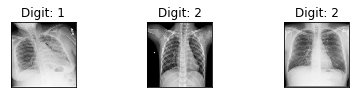

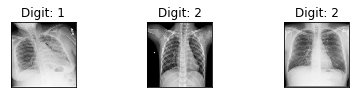

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(3):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
num_category = 4
import keras
#set number of categories
# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_category)
y_test = keras.utils.np_utils.to_categorical(y_test, num_category)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 299, 299, 1))
X_test = X_test.reshape((X_test.shape[0], 299, 299, 1))

In [ ]:
y_train.shape

(16932, 4)

In [ ]:
epochs = 50
batch_size = 32

In [ ]:
model=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))    
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(299,299,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(LayerNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(LayerNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(4,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


#datagen.fit(X_train)
train_gen = datagen.flow(X_train, y_train, batch_size=batch_size)


In [ ]:
test_datagen = ImageDataGenerator()
test_gen = test_datagen.flow(X_test, y_test, batch_size=batch_size)

In [ ]:
history = model.fit(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = X_test.shape[0] // batch_size)

Epoch 1/50
529/529 [==============================] - 756s 1s/step - loss: 14.5713 - accuracy: 0.4253 - val_loss: 1.4513 - val_accuracy: 0.4863
Epoch 2/50
529/529 [==============================] - 736s 1s/step - loss: 1.2543 - accuracy: 0.5297 - val_loss: 0.9247 - val_accuracy: 0.6122
Epoch 3/50
529/529 [==============================] - 732s 1s/step - loss: 0.9597 - accuracy: 0.6031 - val_loss: 0.8682 - val_accuracy: 0.6179
Epoch 4/50
529/529 [==============================] - 732s 1s/step - loss: 0.9402 - accuracy: 0.6127 - val_loss: 0.8507 - val_accuracy: 0.6477
Epoch 5/50
529/529 [==============================] - 731s 1s/step - loss: 0.8793 - accuracy: 0.6340 - val_loss: 0.8242 - val_accuracy: 0.6591
Epoch 6/50
529/529 [==============================] - 731s 1s/step - loss: 0.8350 - accuracy: 0.6521 - val_loss: 0.8129 - val_accuracy: 0.6652
Epoch 7/50
529/529 [==============================] - 731s 1s/step - loss: 0.7971 - accuracy: 0.6708 - val_loss: 0.7571 - val_accuracy: 0.691

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)